<a href="https://colab.research.google.com/github/jglaser/gigadocking_notebooks/blob/main/Analysis_of_Moonshot_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

# Analyzing the COVID-19 Moonshot dataset

First let's declare the GCP project we'll be accessing and authenticate with Google for access to the project.

In [1]:
project_id = 'cmb-covid19-discovery-collab'

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Download a recent version of the Postera/Diamond Mpro structures

In [3]:
!wget https://fragalysis.diamond.ac.uk/media/targets/Mpro.zip

--2021-02-17 20:12:26--  https://fragalysis.diamond.ac.uk/media/targets/Mpro.zip
Resolving fragalysis.diamond.ac.uk (fragalysis.diamond.ac.uk)... 130.246.215.41
Connecting to fragalysis.diamond.ac.uk (fragalysis.diamond.ac.uk)|130.246.215.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114447897 (109M) [application/zip]
Saving to: ‘Mpro.zip’

Mpro.zip            100%[===================>] 109.15M  26.5MB/s    in 4.8s    

2021-02-17 20:12:31 (22.9 MB/s) - ‘Mpro.zip’ saved [114447897/114447897]



In [4]:
!mkdir -p Mpro
!cd Mpro; unzip ../Mpro.zip

Archive:  ../Mpro.zip
   creating: aligned/
   creating: crystallographic/
  inflating: .DS_Store               
  inflating: alternate_names.csv     
  inflating: New_structures_2021-01-29.xlsx  
  inflating: metadata.csv            
  inflating: sites.csv               
  inflating: Mpro_compound_tracker_excel.xlsx  
  inflating: Mpro_soaks.csv          
  inflating: Mpro_compound_tracker_csv.csv  
  inflating: Mpro_cocrystallisation.csv  
  inflating: hits_ids.csv            
   creating: aligned/Mpro-N0029_0A/
   creating: aligned/Mpro-N0029_0B/
   creating: aligned/Mpro-N0050_0A/
   creating: aligned/Mpro-N0050_0B/
   creating: aligned/Mpro-N0066_0A/
   creating: aligned/Mpro-N0066_0B/
   creating: aligned/Mpro-N0077_0A/
   creating: aligned/Mpro-x0072_0A/
   creating: aligned/Mpro-x0104_0A/
   creating: aligned/Mpro-x0107_0A/
   creating: aligned/Mpro-x0161_0A/
   creating: aligned/Mpro-x0165_0A/
   creating: aligned/Mpro-x0177_0A/
   creating: aligned/Mpro-x0194_0A/
   creating:

In [5]:
import glob
import os

structures = glob.glob('Mpro/aligned/*')
receptor_files = [f + "/" + os.path.basename(f) + "_apo-desolv.pdb" for f in structures]
ligand_files = [f + "/" + os.path.basename(f) + ".pdb" for f in structures]

### Contacts calculation

Install the GPU kernel to calculate atom-atom contacts between the ligand and the protein. *Needs to be done first before the other installation of the other software packages.*

In [ ]:
%%time
!pip install git+https://github.com/jglaser/contacts.git@add_python

  Cloning https://github.com/jglaser/contacts.git (to revision add_python) to /tmp/pip-req-build-23agxiag
  Running command git clone -q https://github.com/jglaser/contacts.git /tmp/pip-req-build-23agxiag
  Running command git checkout -b add_python --track origin/add_python
  Switched to a new branch 'add_python'
  Branch 'add_python' set up to track remote branch 'add_python' from 'origin'.
  Created wheel for contacts: filename=contacts-0.1-cp36-none-any.whl size=2826 sha256=479545307f8d9ae85fb9d688d7d36c438501b889ae713108c310d5738b6bd65c
  Stored in directory: /tmp/pip-ephem-wheel-cache-_m30iwaw/wheels/f4/53/e4/6f7d288276128c34fc4ef29378b0dca24349ef9fdd0151d1c1
Successfully built contacts
CPU times: user 19.6 ms, sys: 8.92 ms, total: 28.5 ms
Wall time: 6.64 s


### Install some cheminformatics software packages (takes a few minutes)


In [ ]:
# see also https://colab.research.google.com/drive/12pdvG99aij2put7o_QX-aw3MkRWdZa2g#scrollTo=y2IaxgQ5hAZx
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda create -y -n py37 python=3.7 
!time conda install -n py37 -q -y -c conda-forge rdkit
!time conda install -n py37 -q -y -c conda-forge openbabel oddt
!time pip install py3dmol
import sys
import os
sys.path.append('/usr/local/envs/py37/lib/python3.7/site-packages/')
os.environ['PATH'] = '/usr/local/envs/py37/bin:' + os.environ['PATH']

--2021-02-17 02:54:24--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2021-02-17 02:54:24--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  89.87M   179MB/s    in 0.5s    

2021-02-17 02:54:25 (179 MB/s) - ‘Miniconda3-latest-Linux

## Scoring

Here we calculate the rf-score-3, a random forest-based scoring function, on the protein-ligand complexes. There's an easy (but slow) way to do it by just using pre-compiled binaries, and a more generalizable one, which however requires training the scoring function first. In this notebook, we'll choose the easy way.


First, download the binary

In [ ]:
!wget http://ballester.marseille.inserm.fr/rf-score-3.tgz
!tar xvfz rf-score-3.tgz

--2021-02-15 04:52:42--  http://ballester.marseille.inserm.fr/rf-score-3.tgz
Resolving ballester.marseille.inserm.fr (ballester.marseille.inserm.fr)... 195.220.67.241
Connecting to ballester.marseille.inserm.fr (ballester.marseille.inserm.fr)|195.220.67.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33347743 (32M) [application/x-gzip]
Saving to: ‘rf-score-3.tgz’

rf-score-3.tgz      100%[===================>]  31.80M  8.13MB/s    in 5.9s    

2021-02-15 04:52:48 (5.35 MB/s) - ‘rf-score-3.tgz’ saved [33347743/33347743]

rf-score-3/
rf-score-3/rf-score
rf-score-3/receptor.pdbqt
rf-score-3/ligand.pdbqt
rf-score-3/pdbbind-2015-refined.rf
rf-score-3/pdbbind-2013-refined.rf
rf-score-3/README.md
rf-score-3/rf-score.exe
rf-score-3/pdbbind-2014-refined.rf


Now let's apply this scoring function to the experimental data!

In [ ]:
from tqdm.notebook import tqdm
import subprocess

rf3_scores = []
for l,r in tqdm(list(zip(ligand_files, receptor_files))):
  try:
    rf3_scores.append(float(subprocess.check_output(['./rf-score-3/rf-score','rf-score-3/pdbbind-2015-refined.rf',
                                  r,
                                  l,
                                  #pdbqt_dir+'/'+os.path.basename(r).split('.')[0]+'.pdbqt',
                                  #pdbqt_dir+'/'+os.path.basename(l).split('.')[0]+'.pdbqt'
                                  ])))
  except:
    rf3_scores.append(None)

In [ ]:
# store these results in a DataFrame
import pandas as pd
df_diamond = pd.DataFrame.from_dict({
    'id': [os.path.basename(l).split('.')[0] for l in ligand_files],
    'rf3': rf3_scores
})

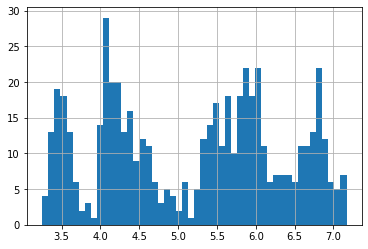

In [ ]:
# plot the distribution of scores
df_diamond.rf3.hist(bins=50)

## Compute the enrichment factor based on experimental affinities

We'll calculate the how many active compounds can be found in the top x% of the data according to RFscore3. Activities are available (only) for a subset of the crystal structures



In [ ]:
# load the activity data
import pandas as pd
activities_diamond = pd.read_csv('Mpro/Mpro_compound_tracker_csv.csv')
activities_diamond.columns

Index(['Compound ID', 'SMILES', 'Library', 'Shipment', 'Plate name', 'Well',
       'No of soaks/co-crystallisations', 'Crystals mounted',
       'Datasets collected', 'Status', 'Date Last Updated', 'Dataset',
       'Fragalysis', 'PDB Code', 'Zenodo Status', 'Postera series',
       'Rapid Fire inhibition at 50 uM', 'Rapid Fire avg IC50 (uM)',
       'Fluorescence inhibition at 50 uM', 'Fluorescence avg IC50 (uM)',
       'NMR std ratio', 'Trypsin IC50 (uM)'],
      dtype='object')

Let's look at the distribution of activities (pIC50 values)

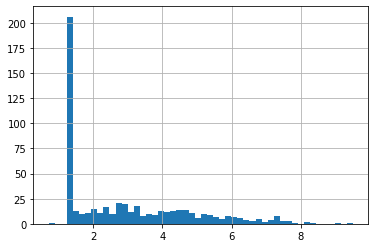

In [ ]:
import numpy as np
activities_diamond['f_pIC50'] = 6 - np.log(activities_diamond['Fluorescence avg IC50 (uM)'])
activities_diamond.f_pIC50.hist(bins=50)

In [ ]:
df_diamond['Dataset'] = [os.path.basename(l).split('.')[0].split('_')[0]  for l in ligand_files]

In [ ]:
# merge the two dataframes
scores_activities = df_diamond.merge(activities_diamond,on='Dataset',how='inner') 

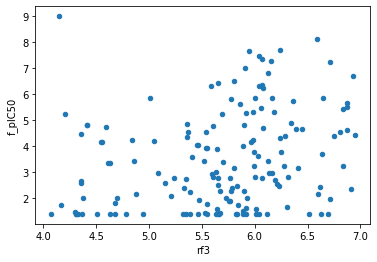

In [ ]:
# plot the cross correlation
scores_activities.plot.scatter(x='rf3',y='f_pIC50')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

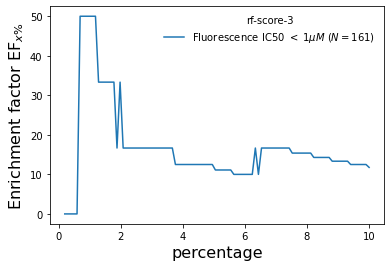

In [ ]:
# compute the enrichment
def enrichment_factor(y_true, y_score, percentage=1):
    sample = y_true[y_score>=np.quantile(y_score, 1-percentage/100)]
    return 100*np.count_nonzero(sample)/len(sample)

x = np.linspace(.2,10,100)

fig, ax = plt.subplots()
c = 'Fluorescence avg IC50 (uM)'
df_select = scores_activities[scores_activities[c].notnull()]
y_true = df_select[c] <= 1
y = [enrichment_factor(y_true, df_select.rf3, percentage=p) for p in x]
ax.plot(x,y,label='Fluorescence IC50 $<$ 1$\mu M$ ($N={}$)'.format(len(df_select)))

# c = 'Fluorescence inhibition at 50 uM'
# df_select = scores_activities[scores_activities[c].notnull()]
# y_true = df_select[c] >= 50
# y = [enrichment_factor(y_true, df_select.rf3, percentage=p) for p in x]
# ax.plot(x,y,label='Flourescence inhibition at 50uM >= 50% ($N={}$)'.format(len(df_select)))

ax.legend(frameon=False,title='rf-score-3')
ax.set_xlabel('percentage',fontsize=16)
ax.set_ylabel('Enrichment factor EF$_{x \%}$',fontsize=16)
fig.show()

## Match activities with Enamine REAL docked compounds 

Here we'll match the activities from Moonshot with the scores of compounds in the Gigadocking dataset, for those compounds that are present in the Enamine REAL database

In [ ]:
# download the dataset
!wget https://covid.postera.ai/covid/submissions.csv
!wget https://covid.postera.ai/covid/activity_data.csv

--2021-02-14 18:58:09--  https://covid.postera.ai/covid/submissions.csv
Resolving covid.postera.ai (covid.postera.ai)... 52.25.207.189, 52.42.210.187
Connecting to covid.postera.ai (covid.postera.ai)|52.25.207.189|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /static/submissions.csv [following]
--2021-02-14 18:58:09--  https://covid.postera.ai/static/submissions.csv
Reusing existing connection to covid.postera.ai:443.
HTTP request sent, awaiting response... 200 OK
Length: 15097358 (14M) [application/octet-stream]
Saving to: ‘submissions.csv’

submissions.csv     100%[===================>]  14.40M  25.3MB/s    in 0.6s    

2021-02-14 18:58:09 (25.3 MB/s) - ‘submissions.csv’ saved [15097358/15097358]

--2021-02-14 18:58:09--  https://covid.postera.ai/covid/activity_data.csv
Resolving covid.postera.ai (covid.postera.ai)... 52.25.207.189, 52.42.210.187
Connecting to covid.postera.ai (covid.postera.ai)|52.25.207.189|:443... connected.
HTTP request sent, awai

In [ ]:
submissions = pd.read_csv('submissions.csv',sep=',')
submissions.columns

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,9,10,11,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['SMILES', 'CID', 'CID (canonical)', 'CID (old format)', 'Postera Link',
       'InChIKey', 'Submission Creator', 'Submission Rationale',
       'Submission Notes', 'Submission Fragments', 'Structure ID',
       'Fragalysis Link', 'Enamine - REAL Space',
       'Enamine - Extended REAL Space', 'Enamine - SCR', 'Enamine - BB',
       'Mcule', 'Mcule Ultimate', 'In Molport or Mcule', 'In eMolecules',
       'Ordered', 'Made', 'Assayed', 'MW', 'cLogP', 'TPSA', 'Rotatable Bonds',
       'Fraction sp3', 'HBA', 'HBD', 'Covalent Fragment', 'Covalent Warhead',
       'Acrylamide', 'Acrylamide Adduct', 'Chloroacetamide',
       'Chloroacetamide Adduct', 'Vinylsulfonamide', 'Vinylsulfonamide Adduct',
       'Nitrile', 'Nitrile Adduct', 'r_inhibition_at_20_uM',
       'r_inhibition_at_50_uM', 'r_avg_IC50', 'f_inhibition_at_20_uM',
       'f_inhibition_at_50_uM', 'f_avg_IC50', 'f_avg_pIC50',
       'relative_solubility_at_20_uM', 'relative_solubility_at_100_uM',
       'trypsin_IC50', 'NMR_s

In [ ]:
activities = pd.read_csv('activity_data.csv',sep=',')
activities.columns

Index(['SMILES', 'CID', 'canonical_CID', 'r_inhibition_at_20_uM',
       'r_inhibition_at_50_uM', 'r_avg_IC50', 'f_inhibition_at_20_uM',
       'f_inhibition_at_50_uM', 'f_avg_IC50', 'f_avg_pIC50',
       'relative_solubility_at_20_uM', 'relative_solubility_at_100_uM',
       'trypsin_IC50', 'NMR_std_ratio', 'acrylamide', 'chloroacetamide',
       'series', 'frag_id'],
      dtype='object')

In [ ]:
df = activities.merge(submissions[['CID (canonical)','Enamine - REAL Space']],
                      left_on='canonical_CID',right_on='CID (canonical)',how='inner')
df = df.drop(columns=['CID (canonical)'],axis=1) # remove invalid/duplicate column names
df = df.rename(columns={'Enamine - REAL Space': 'enamine_id'})

(df['enamine_id'] != 'False').sum()

429

### Merge the Moonshot data with the Gigadocking results

*Note: Uploading the Moonshot data will only be possible with if you have permission to edit the BQ tables.*

You can however proceed by skipping this step, assuming the data has already been uploaded by someone else :)


In [ ]:
%load_ext google.colab.data_table

In [ ]:
# this will only work with the right privileges
df.to_gbq('moonshot.activities',project_id=project_id,if_exists='replace')

1it [00:05,  5.07s/it]


In [ ]:
%%bigquery df_merge --project $project_id
SELECT * FROM
  (SELECT *, SPLIT(name,"_")[OFFSET(0)] AS name_first
   FROM mpro_5r84.scores_rank0
  ) AS A
INNER JOIN moonshot.activities
ON A.name_first=activities.enamine_id

In [ ]:
df_merge.head()

,name,vs_dude_v1,vs_dude_v2,vs_dude_v3,vs_dock_v1,vs_dock_v2,vs_dock_v3,vs_vina_v1,vs_vina_v2,vs_vina_v3,rf3,__null_dask_index__,name_first,SMILES,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id,enamine_id
0,Z57054209_1_T1,5.950000,5.950000,5.951703,5.950000,5.950000,5.950000,5.95,5.952702,5.976437,5.613038,213886,Z57054209,CN(CC(=O)Nc1ccccc1Br)C(=O)CCl,TAT-ENA-80bfd3e5-42,TAT-ENA-80bfd3e5-42,NaN,52.275,NaN,NaN,NaN,5.903614,5.228882,NaN,NaN,NaN,NaN,False,True,Ugi,None,Z57054209
1,Z57054209_1_T1,5.950000,5.950000,5.951703,5.950000,5.950000,5.950000,5.95,5.952702,5.976437,5.613038,213886,Z57054209,CN(CC(=O)Nc1ccccc1Br)C(=O)CCl,TAT-ENA-80bfd3e5-42,TAT-ENA-80bfd3e5-42,NaN,52.275,NaN,NaN,NaN,5.903614,5.228882,NaN,NaN,NaN,NaN,False,True,Ugi,None,Z57054209
2,Z57054209_1,5.950000,5.966349,5.953342,5.950000,5.952573,5.952112,5.95,5.961755,5.960504,5.420213,215382,Z57054209,CN(CC(=O)Nc1ccccc1Br)C(=O)CCl,TAT-ENA-80bfd3e5-42,TAT-ENA-80bfd3e5-42,NaN,52.275,NaN,NaN,NaN,5.903614,5.228882,NaN,NaN,NaN,NaN,False,True,Ugi,None,Z57054209
3,Z57054209_1,5.950000,5.966349,5.953342,5.950000,5.952573,5.952112,5.95,5.961755,5.960504,5.420213,215382,Z57054209,CN(CC(=O)Nc1ccccc1Br)C(=O)CCl,TAT-ENA-80bfd3e5-42,TAT-ENA-80bfd3e5-42,NaN,52.275,NaN,NaN,NaN,5.903614,5.228882,NaN,NaN,NaN,NaN,False,True,Ugi,None,Z57054209
4,Z3076880033_1_T1,5.953872,5.979941,6.019541,5.958902,6.024245,5.988050,5.95,5.997639,5.991161,6.904846,324495,Z3076880033,NS(=O)(=O)c1ccc(N2CCC(c3ccncc3)CC2)cc1,WAR-XCH-b72a1bbc-15,WAR-XCH-b72a1bbc-15,1.055,1.845,NaN,0.87468,1.645028,NaN,NaN,1.0,0.94,NaN,NaN,False,False,None,None,Z3076880033


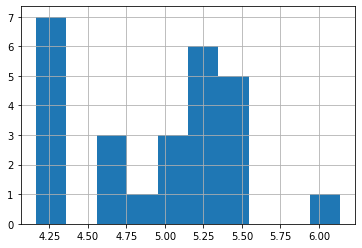

In [ ]:
df_merge['f_avg_pIC50'].hist()

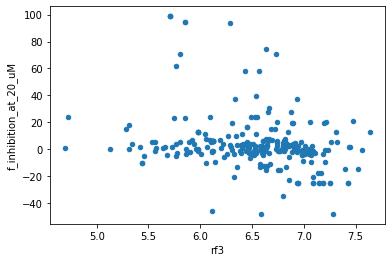

In [ ]:
df_merge.plot.scatter(x='rf3',y='f_inhibition_at_20_uM')

In [ ]:
## Try with raw AutodockGPU scores
%%bigquery df_autodock --project $project_id
SELECT * FROM
  (SELECT *, SPLIT(name,"_")[OFFSET(0)] AS name_first
   FROM mpro_5r84.scores
   WHERE rank = 0
  ) AS A
INNER JOIN moonshot.activities
ON A.name_first=activities.enamine_id

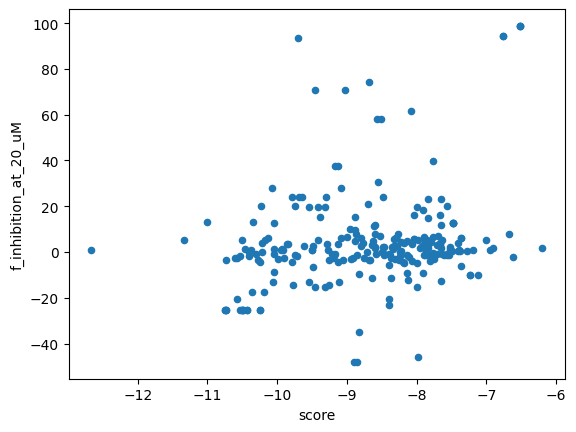

In [ ]:
df_autodock.plot.scatter(x='score',y='f_inhibition_at_20_uM')

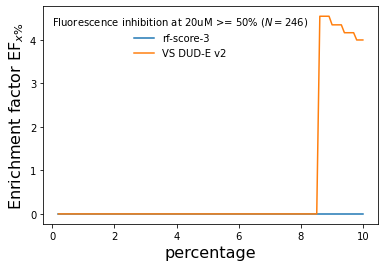

In [ ]:
# plot the enrichment
x = np.linspace(.2,10,100)

fig, ax = plt.subplots()

c = 'f_inhibition_at_20_uM'
df_select = df_merge[df_merge[c].notnull()]
y_true = df_select[c] >= 50
y = [enrichment_factor(y_true, df_select.rf3, percentage=p) for p in x]
ax.plot(x,y,label='rf-score-3')

c = 'f_inhibition_at_20_uM'
df_select = df_merge[df_merge[c].notnull()]
y_true = df_select[c] >= 50
y = [enrichment_factor(y_true, df_select.vs_dude_v2, percentage=p) for p in x]
ax.plot(x,y,label='VS DUD-E v2')

ax.legend(frameon=False,title='Fluorescence inhibition at 20uM >= 50% ($N={}$)'.format(len(df_select)))
ax.set_xlabel('percentage',fontsize=16)
ax.set_ylabel('Enrichment factor EF$_{x \%}$',fontsize=16)
fig.show()

### *Here's another idea* .. 

.. correlate docked scores with scores from crystal structures

In [ ]:
df = scores_activities[['Compound ID','rf3','Dataset','Fluorescence avg IC50 (uM)']].merge(submissions[['CID (canonical)','Enamine - REAL Space']],
                      left_on='Compound ID',right_on='CID (canonical)',how='inner')
df = df.drop(columns=['Compound ID'], axis=1)
df = df.rename(columns={'CID (canonical)': 'CID_canonical',
                        'Enamine - REAL Space': 'enamine_id',
                        'Fluorescence avg IC50 (uM)': 'f_avg_IC50'})
df['f_pIC50'] = 6 - np.log(df['f_avg_IC50'])

In [ ]:
# again, this will only work with the right privileges
df.to_gbq('moonshot.diamond_rescored',project_id=project_id,if_exists='replace')

1it [00:02,  2.97s/it]


In [ ]:
%%bigquery df_merge --project $project_id
SELECT * FROM
  (SELECT *, SPLIT(name,"_")[OFFSET(0)] AS name_first
   FROM mpro_5r84.scores_rank0
  ) AS A
INNER JOIN moonshot.diamond_rescored
ON A.name_first=diamond_rescored.enamine_id

In [ ]:
len(df_merge)

83

The cross correlation between docked RF3 scores and crystal RF3 scores, for those crystallized compounds which exist in the Gigadocking dataset. It is indirectly a measure of whether docking can predict the correct pose.


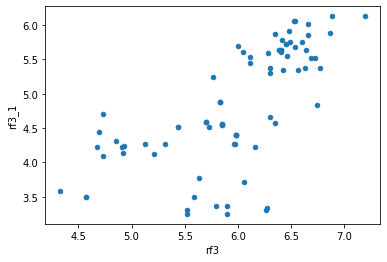

In [ ]:
df_merge.plot.scatter(x='rf3',y='rf3_1')

In [ ]:
df_select.columns

Index(['id', 'rf3', 'Dataset', 'Compound ID', 'SMILES', 'Library', 'Shipment',
       'Plate name', 'Well', 'No of soaks/co-crystallisations',
       'Crystals mounted', 'Datasets collected', 'Status', 'Date Last Updated',
       'Fragalysis', 'PDB Code', 'Zenodo Status', 'Postera series',
       'Rapid Fire inhibition at 50 uM', 'Rapid Fire avg IC50 (uM)',
       'Fluorescence inhibition at 50 uM', 'Fluorescence avg IC50 (uM)',
       'NMR std ratio', 'Trypsin IC50 (uM)', 'f_pIC50'],
      dtype='object')

# Calculate protein-ligand fingerprints

Here, we'll compute the interaction fingerprint between the Mpro receptors and the ligands from the crystal structures

## Convert PDBs to PDBQTs

Use `obabel` to convert the ligands (only) from input **PDB** to **PDBQT** file format. We don't recalculate charges, as we don't need them for the fingerprints (which makes the conversion a bit faster...). We also remove the hydrogens.

We'll deal with the receptor PDBs later, as their files are larger.



In [ ]:
# Store outputs in the subdirectory `pdbqt`.
pdbqt_dir = 'pdbqt'

In [ ]:
import subprocess
from tqdm.notebook import tqdm
! mkdir -p $pdbqt_dir
for l,r in tqdm(list(zip(ligand_files, receptor_files))):
  subprocess.run(['obabel',l,'--partialcharge','none','-d','-O',pdbqt_dir+'/'+os.path.basename(l).split('.')[0]+'.pdbqt'])

### Setup the receptor atom types

In [6]:
# define the residues of interest
residues_of_interest = ['163','166','41','49','54','165','145','142','140', '141', '143', '189', '192','164','187']

In [ ]:
# download a receptor structure for Mpro (needs privileges)
from google.cloud import storage
fn = 'final_Mpro_5R84_gast.pdbqt'
gclient = storage.Client(project_id)
bucket = gclient.get_bucket('ccddc')
blob = bucket.get_blob(fn)
blob.download_to_filename(fn)

In [ ]:
# define the mapping of unique ligand types and participating receptor atoms
import numpy as np
ligand_map = {'A': 0, 'C': 1, 'N': 2, 'NA': 3, 'O': 4, 'OA': 5, 'F': 6, 'P': 7, 'S': 8, 'SA': 9, 'CL': 10,
              'BR': 11, 'I': 12} # wide version
protein_types =  ['A','C','N','NA','O','OA','S','SA']
nligand = len(np.unique([ligand_map[a] for a in ligand_map]))

In [ ]:
# define the receptor atoms of interest based on the protein atom types
conf_receptor = open(fn,'r').read().strip().split('\n')
conf_receptor_atoms = [l for l in conf_receptor if l.startswith('ATOM')]

atoms_of_interest = [int(l[7:11].lstrip())
                           for l in conf_receptor_atoms if l[77:79].strip() in protein_types
                           and l[22:26].lstrip() in residues_of_interest]
atom_names_of_interest = [(l[22:26].lstrip(),l[13:16].rstrip())
                           for l in conf_receptor_atoms if l[77:79].strip() in protein_types
                           and l[22:26].lstrip() in residues_of_interest]                           

We'll be using diffferent receptor structures for Mpro, which have the same aminoacid sequence but potentially different numerical atom IDs. Therefore we'll create a dict that maps atom IDs onto receptor residues and atom names, which allows us to look up atoms of interest in the different receptor files.

In [ ]:
# store the residue-atom information in a dict for later unmapping with the different receptor PDBQTs
from collections import OrderedDict
res_dict = OrderedDict()
for r, a in atom_names_of_interest:
    if r not in res_dict:
        res_dict[r] = []
    res_dict[r].append(a)

### Parameters that characterize the fingerprint

In [ ]:
nbins = 1 # number of distance bins
binsize = 4 # in A
nfeatures = nligand*len(atoms_of_interest)*nbins
print(nfeatures)

1690


## Compute the fingerprints, one by one

We'll compute the fingerprint separately for each protein-ligand pair, using the above mapping of atoms of interests to residues. This calculation uses a naîve loop over pairs, and there is not much to be gained from using the GPU here, except that the code is implemented in CUDA, which is why we'll use it anyway. 

In the data-parallel version, which is not implemented here, the calculation parses the coordinates for a batch of ligands **for the same target** in parallel. It uses `cudf` to do the (parallel) parsing of the PBDQTs.

In [ ]:
import cupy as cp
import contacts
from tqdm.notebook import tqdm

fingerprints = []

for l,r in tqdm(list(zip(ligand_files, receptor_files))):
  l_pdbqt = pdbqt_dir+'/'+os.path.basename(l).split('.')[0]+'.pdbqt'

  # load receptor atom types
  conf_receptor = open(r,'r').read().strip().split('\n')
  conf_receptor_atoms = [l for l in conf_receptor if l.startswith('ATOM')]

  # map atoms of interest onto this model
  atoms_of_interest = []
  atom_n = {}
  for r in res_dict:
      for a in res_dict[r]:
          for l in conf_receptor_atoms:
              if l[13:16].rstrip() == a and l[23:26].lstrip() == r:
                  
                  if r in atom_n:
                    if a not in atom_n[r]:
                      # some receptors have substitutions with two Calphas, only take the first one
                      atoms_of_interest.append(int(l[7:11].lstrip()))
                      atom_n[r].append(a)
                  else:
                    atoms_of_interest.append(int(l[7:11].lstrip()))
                    atom_n[r] = [a]

  # load receptor coordinates and atom types
  xyz_receptor = cp.array([(float(l[30:38]), float(l[38:46]), float(l[46:54]))
                          for l in conf_receptor_atoms if int(l[7:11].lstrip()) in atoms_of_interest],dtype=cp.float32)
  types_receptor = cp.array([atoms_of_interest.index(int(l[7:11].lstrip()))
                            for l in conf_receptor_atoms if int(l[7:11].lstrip()) in atoms_of_interest],dtype=cp.int32)

  xyz_receptor_T = xyz_receptor.T.copy()
  x_receptor, y_receptor, z_receptor = xyz_receptor_T[0], xyz_receptor_T[1], xyz_receptor_T[2]

  # load a single ligand PDBQT into a DataFrame
  conf_ligand = open(l_pdbqt,'r').read().strip().split('\n')
  conf_ligand_atoms = [l for l in conf_ligand if l.startswith('ATOM')]
  xyz_ligand = np.array([(float(l[30:38]), float(l[38:46]), float(l[46:54]))
                          for l in conf_ligand_atoms if l[77:79].strip() in ligand_map.keys()],dtype=cp.float32)
  t = cp.array([ligand_map[l[77:79].strip()] for l in conf_ligand_atoms if l[77:79].strip() in ligand_map.keys()],dtype=cp.int32)

  # compute
  x, y, z  = (cp.array(xyz_ligand[:,0]),
              cp.array(xyz_ligand[:,1]),
              cp.array(xyz_ligand[:,2]))
  offsets = cp.asarray([0,len(xyz_ligand)],dtype='int32')

  a = contacts.kernel.compute(x, y, z, t, offsets, x_receptor, y_receptor, z_receptor, types_receptor,
                                  cutoff=nbins*binsize,binsize=binsize, nbins=nbins,
                                  n_receptor_types=len(atoms_of_interest),
                                  n_ligand_types=nligand)
  
  # pack the histogram into a compact (binary) fingerprint using uint8's

   a_packed = np.array(np.packbits(a.get(),axis=-1),dtype='uint8')
   a_padded = np.pad(a_packed,pad_width=((0,0),(0,((a_packed.shape[1]+7)//8)*8-a_packed.shape[1])),mode='constant',constant_values=0)
   fingerprints.append(a_padded.view(dtype='int64')[0])
  
fingerprints = np.vstack(fingerprints)

In [ ]:
# Store the fingerprints in a DataFrame
import pandas as pd
moonshot_fingerprints = pd.DataFrame(fingerprints)
moonshot_fingerprints = moonshot_fingerprints.astype('int64')
moonshot_fingerprints.rename(columns = {c: 'fp'+str(i) for c, i in enumerate(moonshot_fingerprints.columns)}, inplace=True)
moonshot_fingerprints['moonshot_id'] = [os.path.basename(s) for s in structures]

# drop compounds with zero fingerprint
moonshot_fingerprints = moonshot_fingerprints[np.sum(fingerprints,axis=1)>0]

In [ ]:
moonshot_fingerprints.head()

,fp0,fp1,fp2,fp3,fp4,fp5,fp6,fp7,fp8,fp9,fp10,fp11,fp12,fp13,fp14,fp15,fp16,fp17,fp18,fp19,fp20,fp21,fp22,fp23,fp24,fp25,fp26,fp27,fp28,fp29,fp30,fp31,fp32,fp33,fp34,fp35,fp36,fp37,fp38,fp39,...,fp173,fp174,fp175,fp176,fp177,fp178,fp179,fp180,fp181,fp182,fp183,fp184,fp185,fp186,fp187,fp188,fp189,fp190,fp191,fp192,fp193,fp194,fp195,fp196,fp197,fp198,fp199,fp200,fp201,fp202,fp203,fp204,fp205,fp206,fp207,fp208,fp209,fp210,fp211,moonshot_id
1,0,1,0,0,1,225,238,0,128,64,0,64,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x2608_0A
2,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,192,0,0,0,0,3,17,224,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x0731_0A
3,2,1,0,0,0,0,2,1,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,224,0,0,0,0,0,0,0,0,32,0,0,0,0,0,32,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x11587_0A
4,22,1,0,0,0,0,0,0,0,0,2,48,0,0,224,0,5,0,64,0,0,0,7,0,0,0,1,144,0,24,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x1249_0A
5,0,0,0,0,0,0,0,0,0,0,0,112,1,0,240,0,7,1,192,0,0,0,0,0,0,0,0,0,0,16,193,0,0,0,64,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x0195_0A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,1,0,0,129,225,224,0,128,64,2,81,124,0,128,0,0,0,0,0,0,0,28,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x11743_0A
374,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,192,0,0,0,0,0,25,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x1402_0A
375,30,1,0,0,129,225,240,0,128,96,2,33,92,0,0,0,0,0,0,0,0,0,0,0,32,0,0,128,64,0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x11609_0A
376,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,145,64,0,0,0,0,0,0,0,0,148,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mpro-x0395_0A


In [ ]:
# upload to bigquery (if you have permissions)
moonshot_fingerprints.to_gbq('moonshot.fingerprints',project_id=project_id,if_exists='replace')

1it [00:02,  2.95s/it]


## Search for similar fingerprints

In [15]:
%%bigquery --project $project_id moonshot_fingerprints
SELECT * FROM moonshot.fingerprints

In [16]:
fingerprints = moonshot_fingerprints.drop(columns=['moonshot_id'],axis=1).to_numpy()

In [28]:
fingerprints.shape

(346, 212)

In [47]:
import numpy as np
fingerprints_padded = np.pad(fingerprints.astype('uint8',order='C'),
                                      pad_width=((0,0),(0,((fingerprints.shape[1]+7)//8)*8-fingerprints.shape[1])),
                                      mode='constant',constant_values=0)

In [48]:
fingerprints_padded.shape

(346, 216)

In [49]:
216/8

27.0

In [50]:
fingerprints_padded.view('int64')

array([[                278,   63050395588624384,    1970324841168901,
        ...,                   0,                   0,
                          0],
       [                  0,   67554000584572928,            12583175,
        ...,                   0,                   0,
                          0],
       [                  0,                   0,                   0,
        ...,                   0,                   0,
                          0],
       ...,
       [  68857469740253440,   63052993053999232, 1227512373435170816,
        ...,                   0,                   0,
                          0],
       [  71108719798124544,        127775408128,   72339069014671361,
        ...,                   0,                   0,
                          0],
       [                  0,                   0, 2233785415175766016,
        ...,                   0,                   0,
                          0]])

We have to write a function to compute the Jaccard similarity in SQL! Yay!

In [ ]:
jaccard = """
CREATE TEMP FUNCTION
   jaccard_similarity(x ARRAY<INT64>, y ARRAY<INT64>)
AS 
( 
  (
  WITH mytable AS
    (
    SELECT BIT_COUNT(x[OFFSET(i)]) AS a,
           BIT_COUNT(y[OFFSET(i)]) AS b,
           BIT_COUNT(x[OFFSET(i)] & y[OFFSET(i)]) as c
    FROM UNNEST(x) WITH OFFSET AS i
    )
  SELECT (SUM(c))/(SUM(a)+SUM(b)-SUM(c))
  FROM mytable
  )
);
"""

Now we'll compute the Jaccard similarity on the outer product (*cross join*) between the large table of fingerprints and our small table of experimental fingerprints.

The below query will do a brute force search for similarity to a specific experimental structure, sort the scores, and then return the most similar compounds

In [ ]:
# construct the query
q = jaccard+"""
SELECT * FROM
(
  SELECT *, RANK() OVER (PARTITION BY moonshot_id ORDER BY jaccard DESC) AS similarity_rank 
  FROM
    (
      SELECT name, rank, moonshot_id, jaccard_similarity([{}],[{}]) AS jaccard        
      FROM mpro_5r84.fingerprints
      CROSS JOIN moonshot.fingerprints AS B
      WHERE moonshot_id = "Mpro-x2608_0A"
      AND rank = 0
    )
) WHERE similarity_rank <= 100
""".format(','.join(['desc_v2_'+str(i) for i in range(fingerprints.shape[1])]),
           ','.join(['fp'+str(i) for i in range(fingerprints.shape[1])]))

In [ ]:
# construct the query
ncol = 25 # this subset of the 212 feature uint8's takes ~5 min already..
# perhaps one solution is to fully utilize the int64 columns (instead of using uint8s)
# that would increase the density by a factor of 8 and bring us to our desired feature width
q = jaccard+"""
SELECT name, rank, jaccard_similarity([{}],[{}]) AS jaccard        
      FROM mpro_5r84.fingerprints
      ORDER BY jaccard DESC
      LIMIT 100
""".format(','.join([str(moonshot_fingerprints[moonshot_fingerprints.moonshot_id == 'Mpro-x2608_0A']['fp'+str(i)].values[0])
                     for i in range(ncol+0*fingerprints.shape[1])]),
           ','.join(['desc_v2_'+str(i) for i in range(ncol+0*fingerprints.shape[1])]))

In [ ]:
# run the query -- FUN!
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client(project=project_id)
df = client.query(q).to_dataframe()

In [ ]:
df

,name,rank,jaccard
0,PV-001235235431_1_T2,9,0.600000
1,PV-001811539460_1_T1,19,0.590909
2,PV-000854566910_2_T1,15,0.578947
3,PV-000298480864_1_T1,19,0.578947
4,PV-001419664448_2_T2,19,0.578947
...,...,...,...
95,PV-001950432441_2,18,0.550000
96,PV-001628772586_2_T1,10,0.550000
97,PV-000644604039_1_T1,19,0.550000
98,PV-002036196410_1_T1,17,0.550000
